In [1]:
from bioinf_learn import MinHash
from bioinf_learn import WtaHash

%matplotlib inline
%load_ext memory_profiler
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotDataBenchmark
from bioinf_learn.util import measureMinHashWtaHash
import time
import numpy as np

from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer

In [2]:
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
%time %memit datasetBursi = vectorizer.transform( graphs )

peak memory: 493.96 MiB, increment: 389.27 MiB
CPU times: user 22.3 s, sys: 108 ms, total: 22.4 s
Wall time: 23.5 s


### Bursi: best accuracy

In [3]:
max_bin_size = 49
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 1
store_value_with_least_sigificant_bit=2
excess_factor= 14
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size= 4
hash_functions = 903
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]
max_bin_size = 46
shingle_size = 1
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size=3
rangeK_wta = 16
hash_functions = 916
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]

In [4]:
best_accuracy_6600 = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

/home/joachim/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


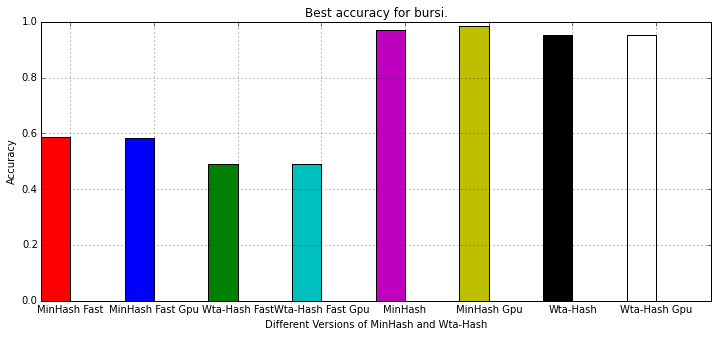

In [5]:
plotDataBenchmark(data=best_accuracy_6600[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best accuracy for bursi.')

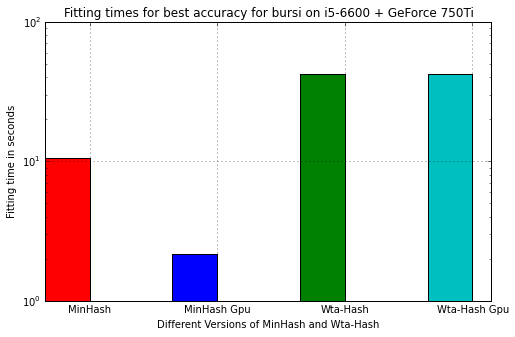

In [6]:
plotDataBenchmark(data=best_accuracy_6600[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best accuracy for bursi on i5-6600 + GeForce 750Ti')

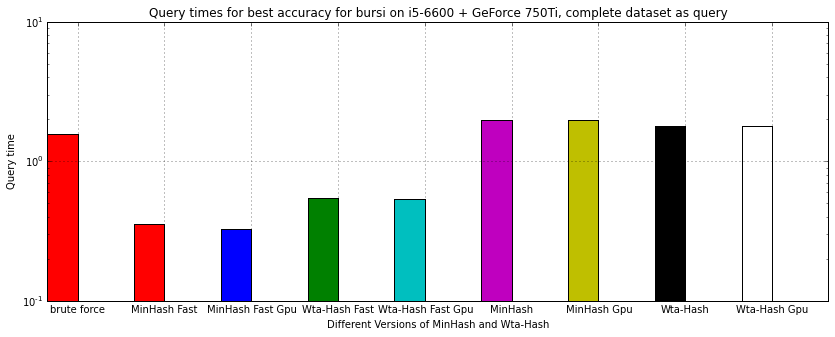

In [7]:
plotDataBenchmark(data=best_accuracy_6600[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best accuracy for bursi on i5-6600 + GeForce 750Ti, complete dataset as query')

In [4]:
print foo

[[0.0031180381774902344, 0.5193259716033936, 0.3563249111175537, 3.820866107940674, 3.825695037841797, 0.10108399391174316, 0.9525752067565918, 0.8814809322357178, 0.45787811279296875, 7.617111921310425, 7.776746034622192, 0.13220000267028809, 0.9372308254241943, 1.6162819862365723, 0.7659809589385986, 15.014462947845459, 14.75042986869812, 0.19054007530212402, 0.7962291240692139, 2.437915802001953, 1.1861851215362549, 22.665796041488647, 22.965058088302612, 0.2692689895629883, 0.8814330101013184, 3.2922561168670654, 1.5668249130249023, 30.028411865234375, 30.23060703277588, 0.36638498306274414, 0.9356889724731445], [1.578265905380249, 0.09536600112915039, 0.08664393424987793, 0.07380008697509766, 0.8167979717254639, 0.6175069808959961, 0.6127719879150391, 0.13828182220458984, 0.15618395805358887, 0.1049041748046875, 0.7412059307098389, 0.7589008808135986, 0.6859819889068604, 0.18415093421936035, 0.16263985633850098, 0.144395112991333, 0.7316391468048096, 0.8213369846343994, 0.74251604

In [4]:
best_accuracy_5200U = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

In [5]:
print len(best_accuracy_5200U[0])
print len(best_accuracy_5200U[1])
print len(best_accuracy_5200U[2])

5
9
8


In [6]:
best_accuracy_5200U = [[0.0072629451751708984, 27.322057962417603, 4.12518310546875, 86.00688099861145, 85.87369108200073], [4.287560939788818, 0.49190306663513184, 0.4720790386199951, 0.9516949653625488, 1.0273680686950684, 3.2188611030578613, 8.745764970779419, 3.218425989151001, 3.2059741020202637], [0.5876181692414111, 0.5846437629697948, 0.49077703481669355, 0.49077703481669355, 0.9712935208669587, 0.9845284759050035, 0.9530551072169703, 0.9530551072169703]]

8


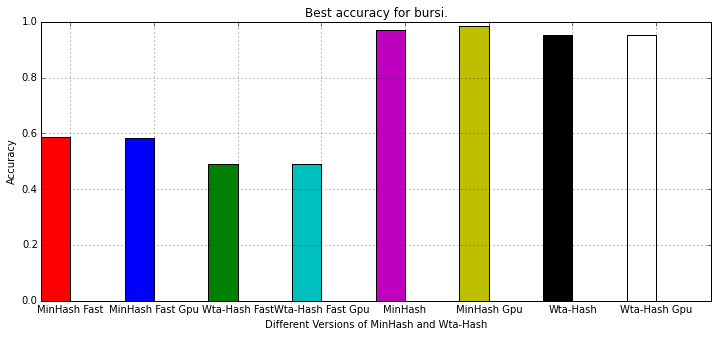

In [25]:
print len(best_accuracy_5200U[2])
plotDataBenchmark(data=best_accuracy_5200U[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best accuracy for bursi.')

In [1]:
plotDataBenchmark(data=best_accuracy_5200U[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best accuracy for bursi on i5-5200U + GeForce 920M')

NameError: name 'plotDataBenchmark' is not defined

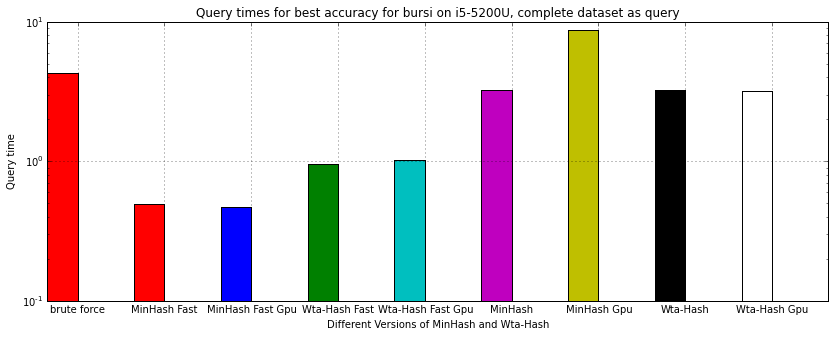

In [33]:
plotDataBenchmark(data=best_accuracy_5200U[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best accuracy for bursi on i5-5200U, complete dataset as query')

### RNA best accuracy

In [3]:
from eden.converter.rna.rnafold import rnafold_to_eden
from eden.converter.fasta import fasta_to_sequence
from eden.graph import Vectorizer
from itertools import islice
import numpy as np
from scipy.sparse import vstack
%matplotlib inline
%load_ext memory_profiler
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData

import time
import numpy as np
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

def rfam_to_matrix(rfam_id, n_max=50, complexity=2, nbits=10):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    seqs = islice(seqs,n_max)
    seqs = list(seqs)
    graphs = rnafold_to_eden(seqs)
    vectorizer = Vectorizer(complexity=complexity, nbits=nbits, positional=True)
    X = vectorizer.transform(graphs)
    return X

def rfam_data(rfam_ids, n_max=300, complexity=3, nbits=13):
    Xs = []
    targets = []
    for i,rfam_id in enumerate(rfam_ids):
        X=rfam_to_matrix(rfam_id, n_max=n_max, complexity=complexity, nbits=nbits)
        Xs.append(X)
        targets += [i] * X.shape[0]
    data_matrix = vstack(Xs, format="csr")
    targets = np.array(targets)    
    return data_matrix, targets

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [4]:
rfam_ids=['RF00004','RF00005','RF00015','RF00020','RF00026','RF00169',
          'RF00380','RF00386','RF01051','RF01055','RF01234','RF01699',
          'RF01701','RF01705','RF01731','RF01734','RF01745','RF01750',
          'RF01942','RF01998','RF02005','RF02012','RF02034']

X, y = rfam_data(rfam_ids, n_max=100, complexity=3, nbits=16)
print 'Instances: %d Features: %d with an avg of %d features per instance' % (X.shape[0], X.shape[1],  X.getnnz()/X.shape[0])
print "Sparsity: ", X.nnz / float(X.shape[0]) / X.shape[1]

Instances: 2300 Features: 65537 with an avg of 3676 features per instance
Sparsity:  0.0560959059967


In [9]:
max_bin_size = 51
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 11
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size= 4
hash_functions = 828
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]
max_bin_size = 30
shingle_size = 3
minimal_blocks_in_common= 1
prune_inverse_index= 1
store_value_with_least_sigificant_bit=2
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size=1
rangeK_wta = 23
hash_functions = 739
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]

In [10]:
best_accuracy_rna_6600 = measureMinHashWtaHash(X, minHash, wtaHash)

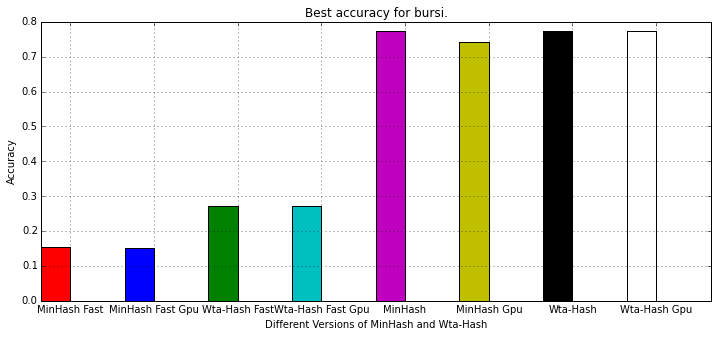

In [11]:
plotDataBenchmark(data=best_accuracy_rna_6600[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best accuracy for bursi.')

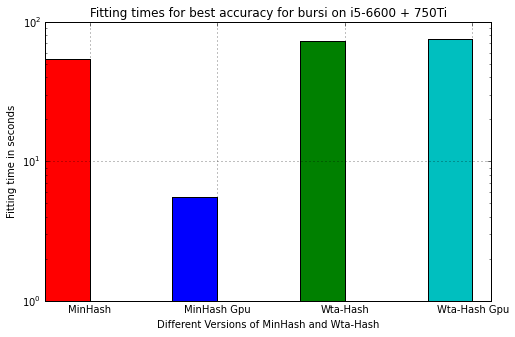

In [12]:
plotDataBenchmark(data=best_accuracy_rna_6600[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best accuracy for bursi on i5-6600 + 750Ti')

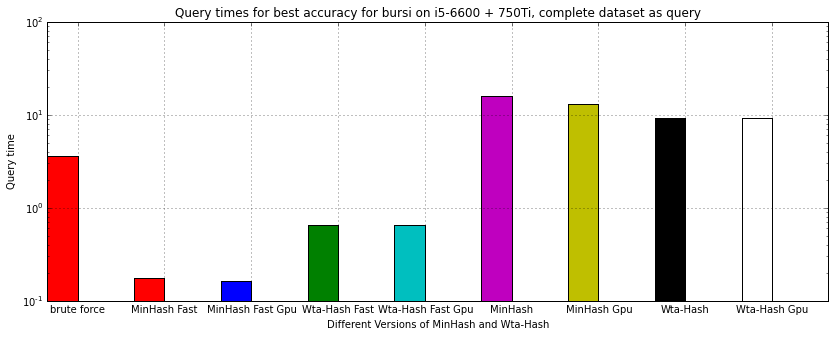

In [13]:
plotDataBenchmark(data=best_accuracy_rna_6600[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best accuracy for bursi on i5-6600 + 750Ti, complete dataset as query')

In [10]:
best_accuracy_rna_5200U = measureMinHashWtaHash(X, minHash, wtaHash)

In [11]:
print len(best_accuracy_rna_5200U[0])
print len(best_accuracy_rna_5200U[1])
print len(best_accuracy_rna_5200U[2])

5
9
8


/home/joachim/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


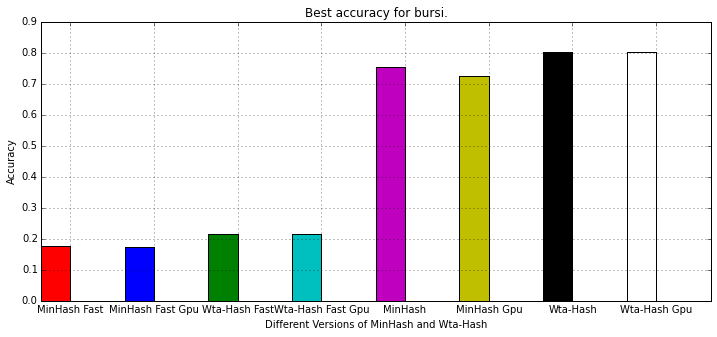

In [12]:
plotDataBenchmark(data=best_accuracy_rna_5200U[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best accuracy for bursi.')

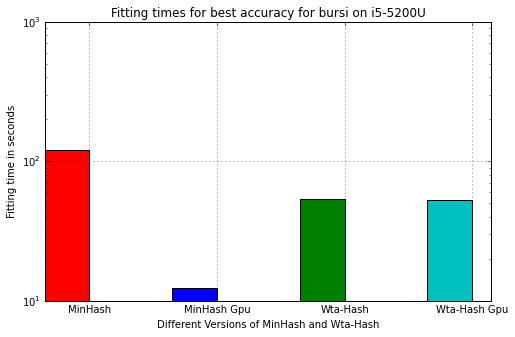

In [13]:
plotDataBenchmark(data=best_accuracy_rna_5200U[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best accuracy for bursi on i5-5200U')

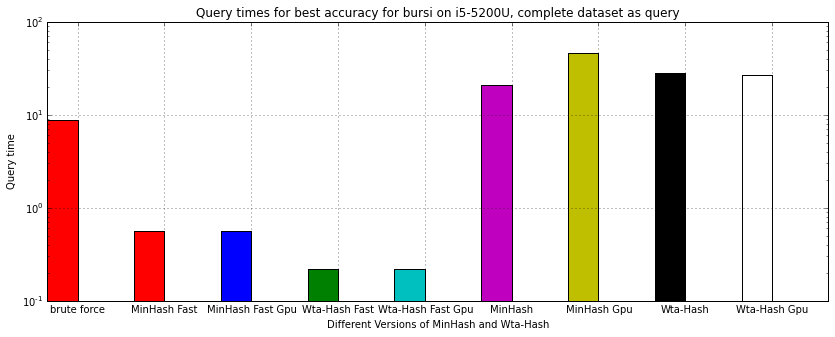

In [14]:
plotDataBenchmark(data=best_accuracy_rna_5200U[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best accuracy for bursi on i5-5200U, complete dataset as query')

### 20-news best accuracy

In [ ]:
max_bin_size = 49
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 1
store_value_with_least_sigificant_bit=2
excess_factor= 14
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size= 4
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size]
max_bin_size = 46
shingle_size = 1
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size=3
rangeK_wta = 16
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size]

In [ ]:
best_accuracy_20news_6600 = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

In [ ]:
best_accuracy_20news_5200U = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

## Best score

### Best score bursi

In [5]:
max_bin_size = 49
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 11
store_value_with_least_sigificant_bit=3
excess_factor= 11
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size= 4
hash_functions = 596
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]
max_bin_size = 87
shingle_size = 4
minimal_blocks_in_common= 1
prune_inverse_index= 6
store_value_with_least_sigificant_bit=1
excess_factor= 11
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size=2
rangeK_wta = 17
hash_functions=186
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_functions]

In [ ]:
best_score_bursi_6600 = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

In [ ]:
plotDataBenchmark(data=best_score_bursi_5200U[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best score for bursi.')

In [ ]:
plotDataBenchmark(data=best_score_bursi_5200U[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best score for bursi on i5-5200U')

In [5]:
best_score_bursi_5200U = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

NameError: name 'datasetBursi' is not defined

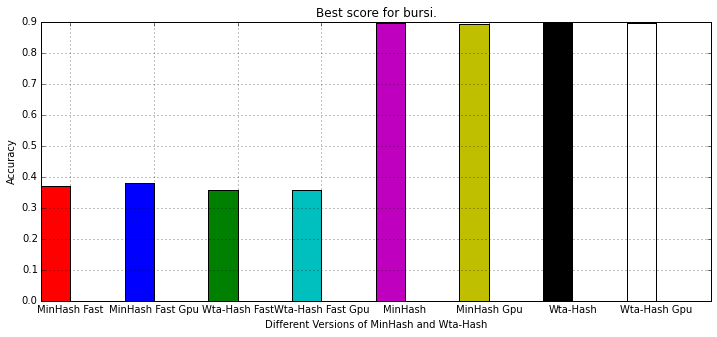

In [18]:
plotDataBenchmark(data=best_score_bursi_5200U[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best score for bursi.')

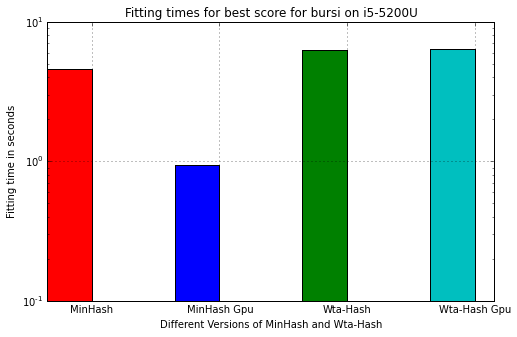

In [19]:
plotDataBenchmark(data=best_score_bursi_5200U[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best score for bursi on i5-5200U')

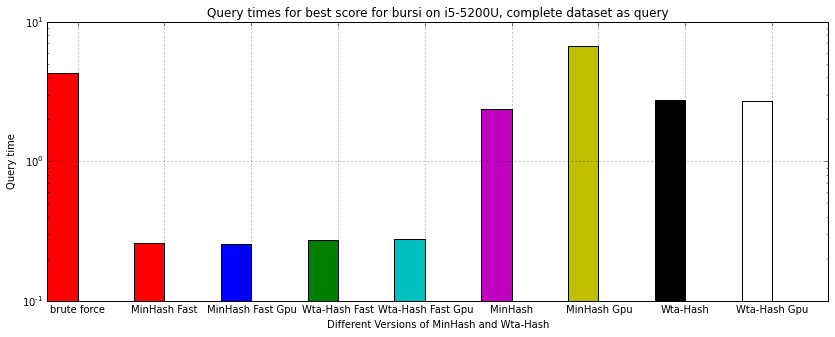

In [20]:
plotDataBenchmark(data=best_score_bursi_5200U[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best score for bursi on i5-5200U, complete dataset as query')

### RNA best score

In [6]:
max_bin_size = 89
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 8
store_value_with_least_sigificant_bit=3
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size= 4
hash_function = 660
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_function]
max_bin_size = 65
shingle_size = 1
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 12
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 0
block_size=3
rangeK_wta = 22
hash_function = 100
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size, hash_function]

In [ ]:
best_score_rna_6600 = measureMinHashWtaHash(X, minHash, wtaHash)

In [7]:
best_score_rna_5200U = measureMinHashWtaHash(X, minHash, wtaHash)

/home/joachim/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


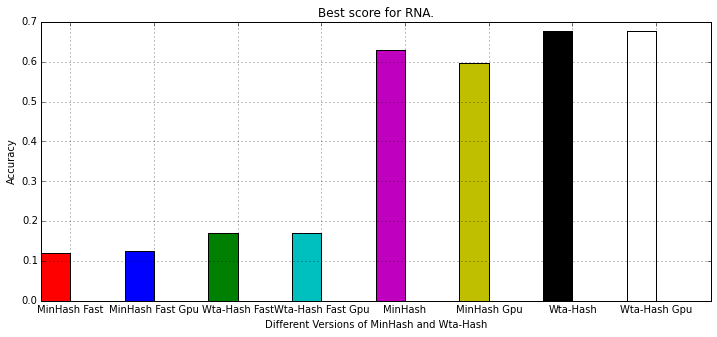

In [8]:
plotDataBenchmark(data=best_score_rna_5200U[2], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Accuracy", number_of_instances=8, bar_width=0.35, figure_size=(12, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = False,
         number_of_features=1, title='Best score for RNA.')

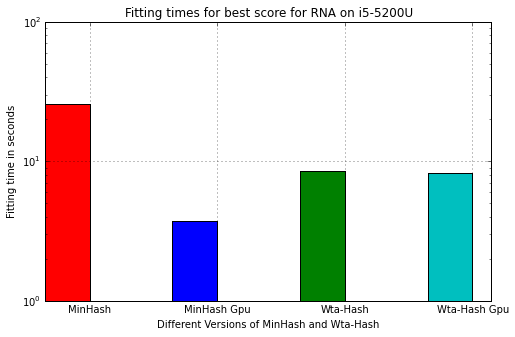

In [9]:
plotDataBenchmark(data=best_score_rna_5200U[0][1:], color=["r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Fitting time in seconds", number_of_instances=4, bar_width=0.35, figure_size=(8, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Fitting times for best score for RNA on i5-5200U')

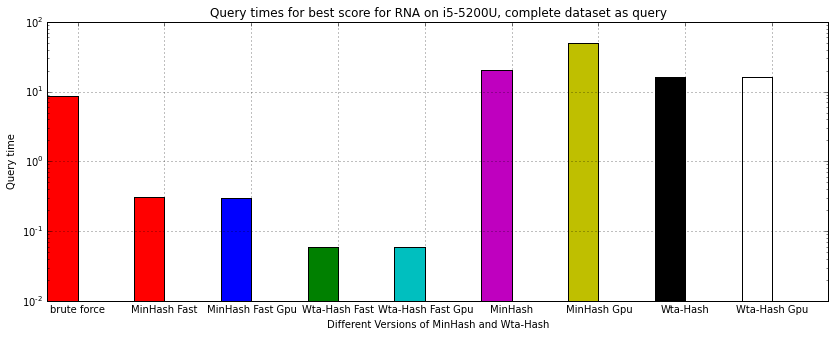

In [10]:
plotDataBenchmark(data=best_score_rna_5200U[1], color=["r","r", "b", "g", "c", "m", "y", "k", "w"], 
         label=["MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
        xticks=["brute force","MinHash Fast", "MinHash Fast Gpu", "Wta-Hash Fast","Wta-Hash Fast Gpu",
               "MinHash", "MinHash Gpu", "Wta-Hash","Wta-Hash Gpu"],
         ylabel="Query time", number_of_instances=9, bar_width=0.35, figure_size=(14, 5),
        xlabel="Different Versions of MinHash and Wta-Hash", log = True,
         number_of_features=1, title='Query times for best score for RNA on i5-5200U, complete dataset as query')

In [ ]:
max_bin_size = 49
shingle_size = 2
minimal_blocks_in_common= 1
prune_inverse_index= 1
store_value_with_least_sigificant_bit=2
excess_factor= 14
prune_inverse_index_after_instance= 0.0
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size= 4
minHash = [max_bin_size, shingle_size, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size]
max_bin_size = 46
shingle_size = 1
minimal_blocks_in_common= 1
prune_inverse_index= 0
store_value_with_least_sigificant_bit=1
excess_factor= 14
prune_inverse_index_after_instance= 0.5
remove_hash_function_with_less_entries_as= 0
shingle= 1
block_size=3
rangeK_wta = 16
wtaHash = [max_bin_size, shingle_size, rangeK_wta, minimal_blocks_in_common, prune_inverse_index, 
            store_value_with_least_sigificant_bit, excess_factor,
            prune_inverse_index_after_instance, remove_hash_function_with_less_entries_as,
            shingle, block_size]

In [ ]:
best_score_20news_6600 = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)

In [ ]:
best_score_20news_5200U = measureMinHashWtaHash(datasetBursi, minHash, wtaHash)